In [2]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [4]:
g<-read.table("./facebook_combined.txt")
g <- graph.data.frame(g, directed=FALSE)

In [5]:
mutual_friends= function(network, node_1, node_2){
    mutual = intersect(neighbors(network,node_1), neighbors(network, node_2))
    return(mutual)
}

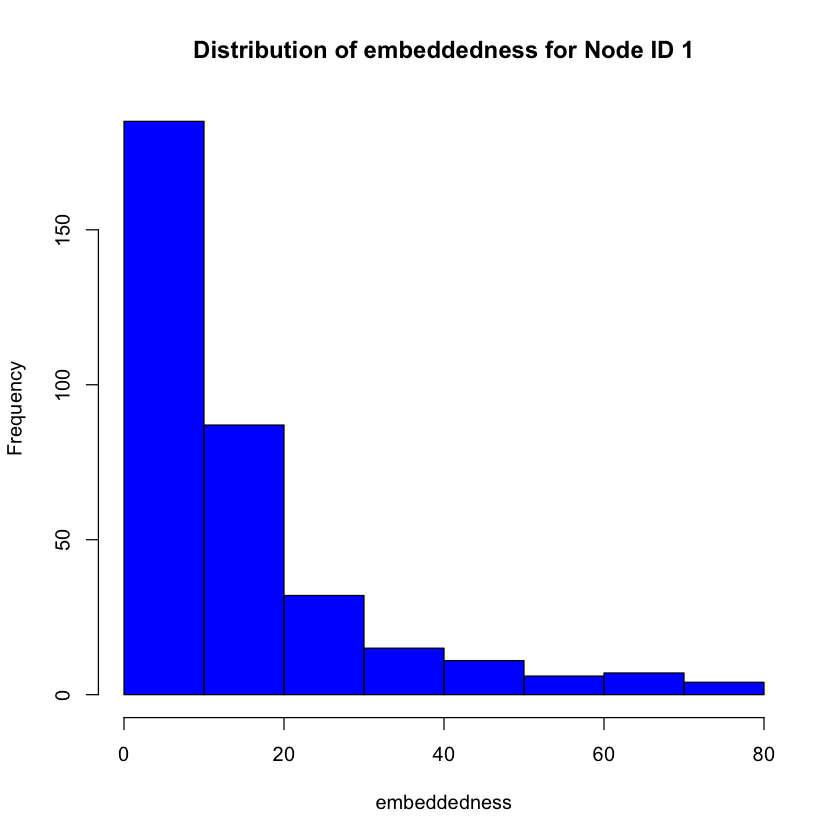

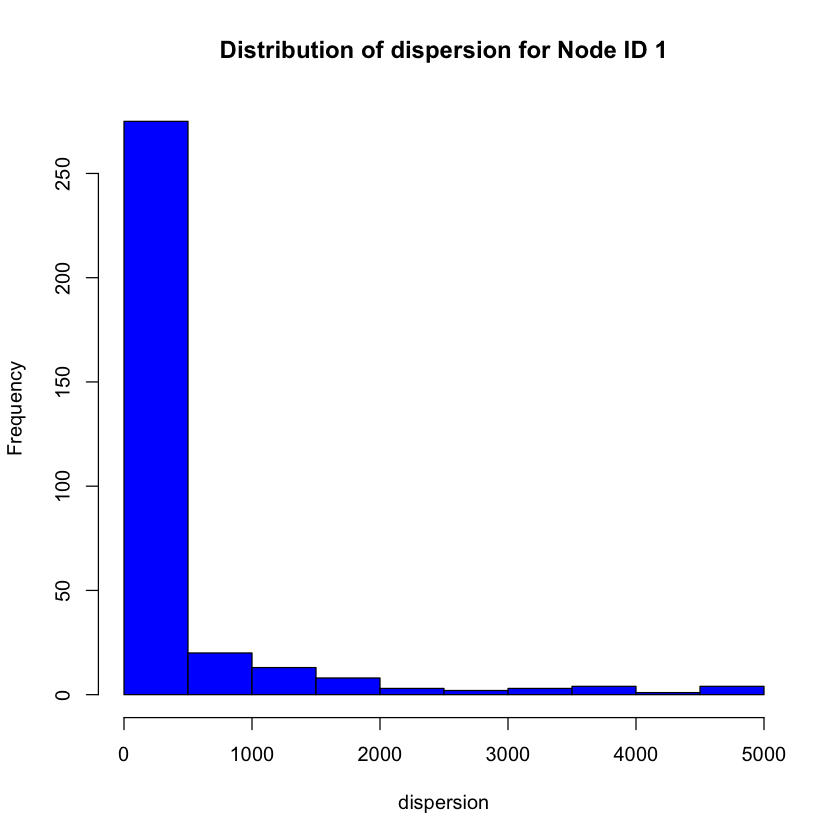

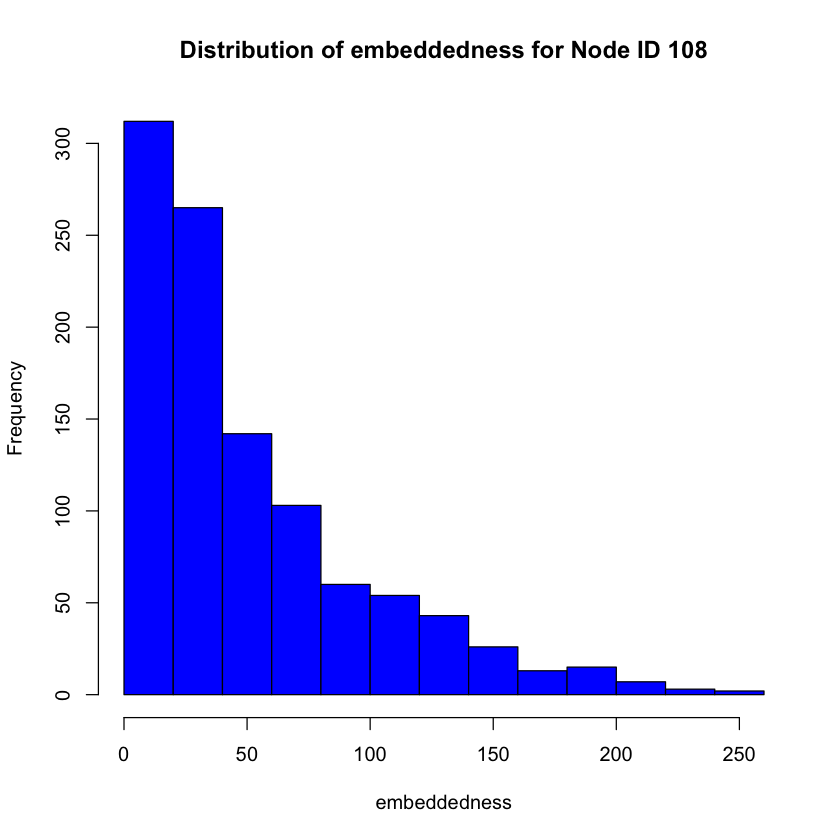

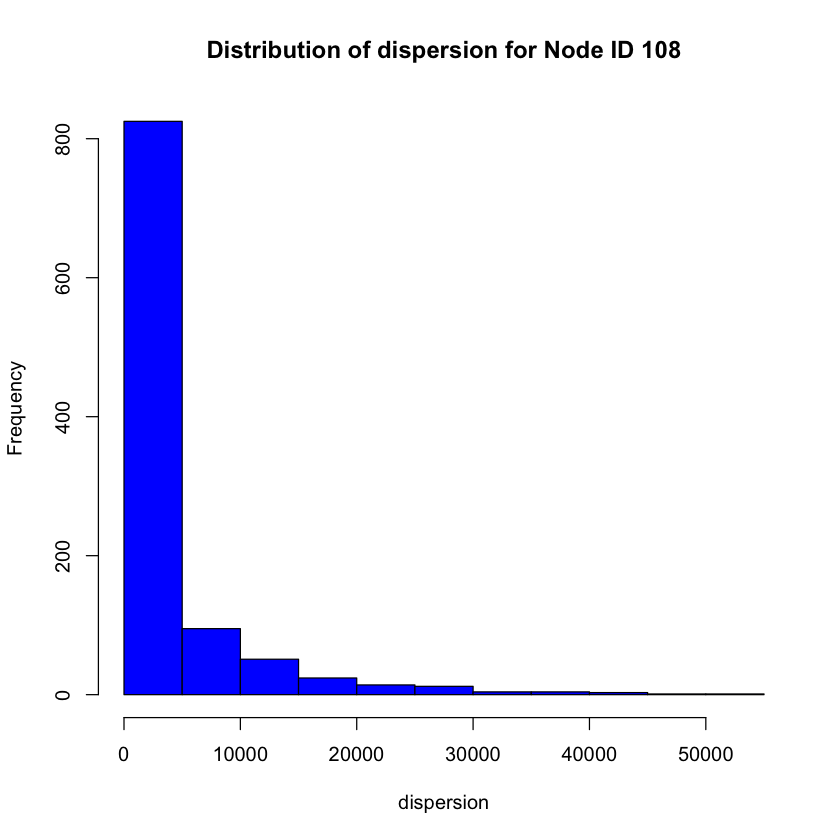

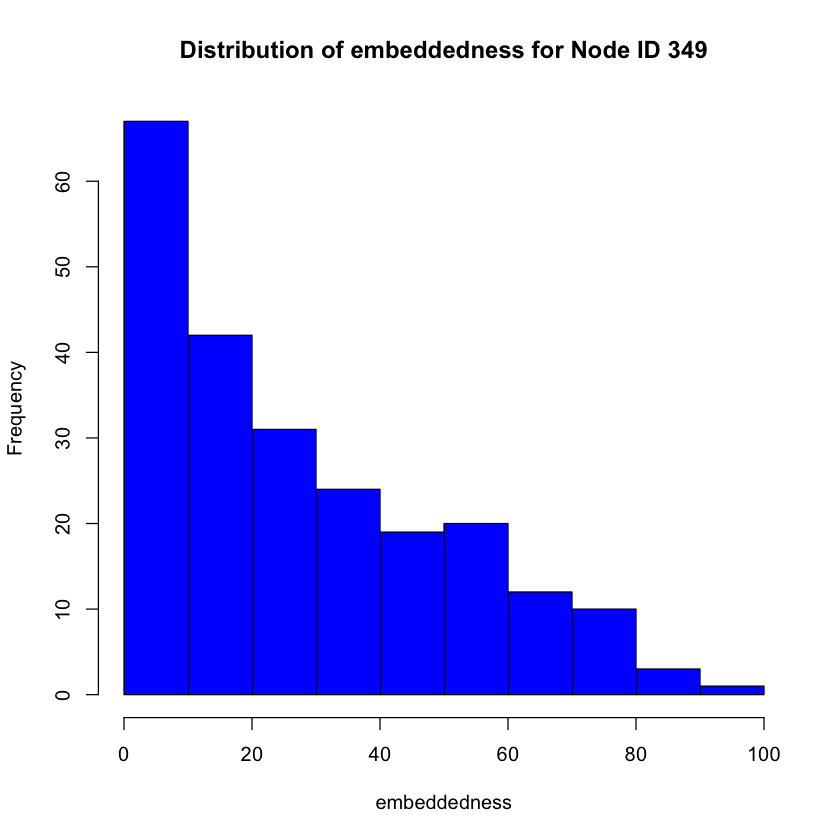

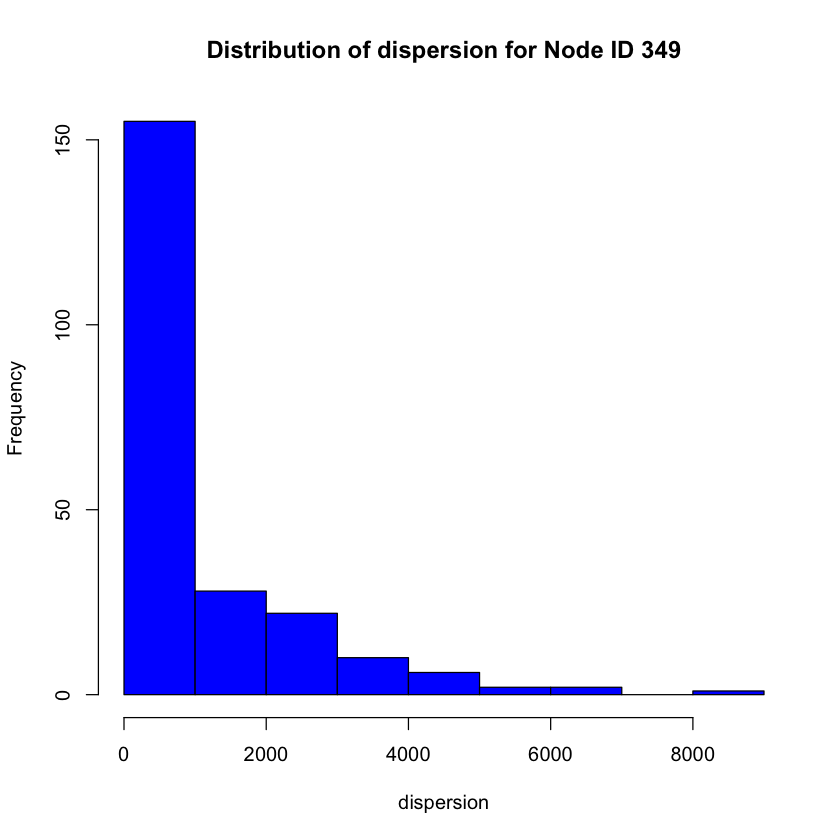

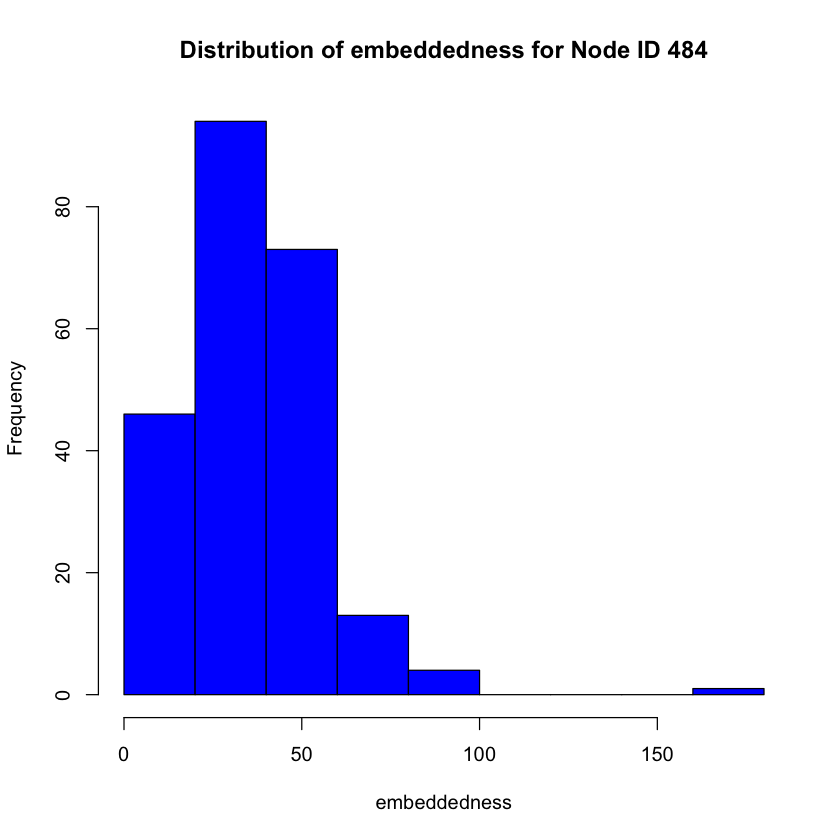

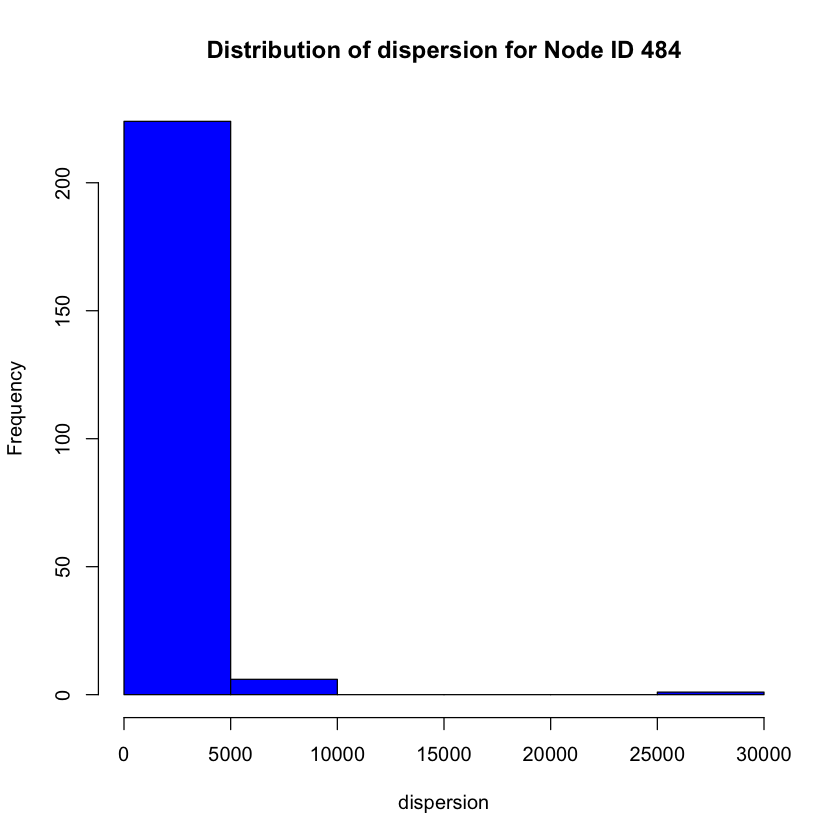

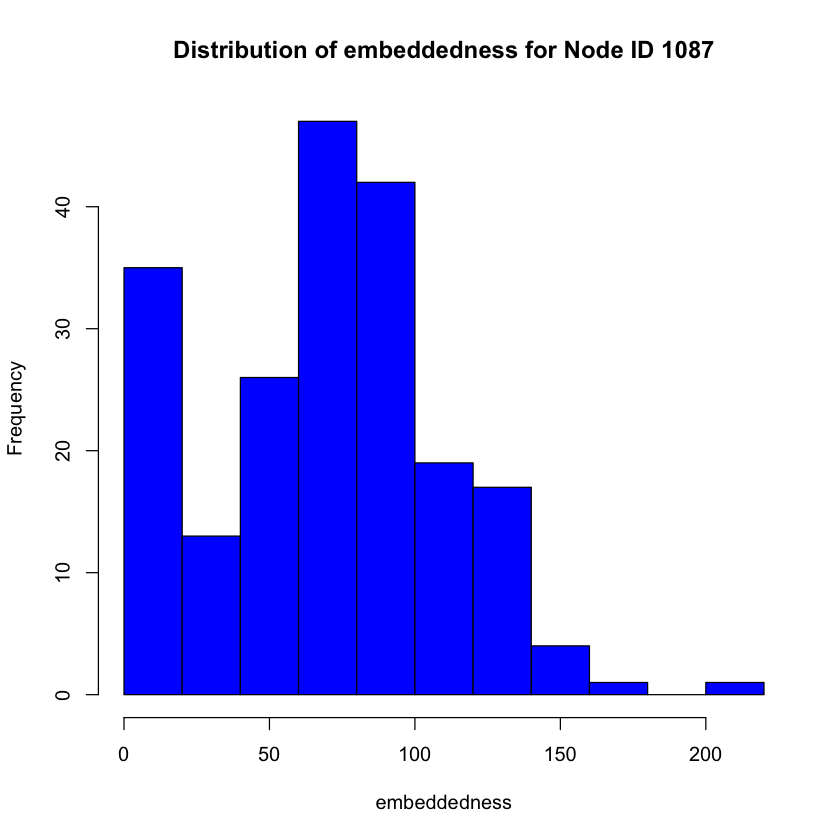

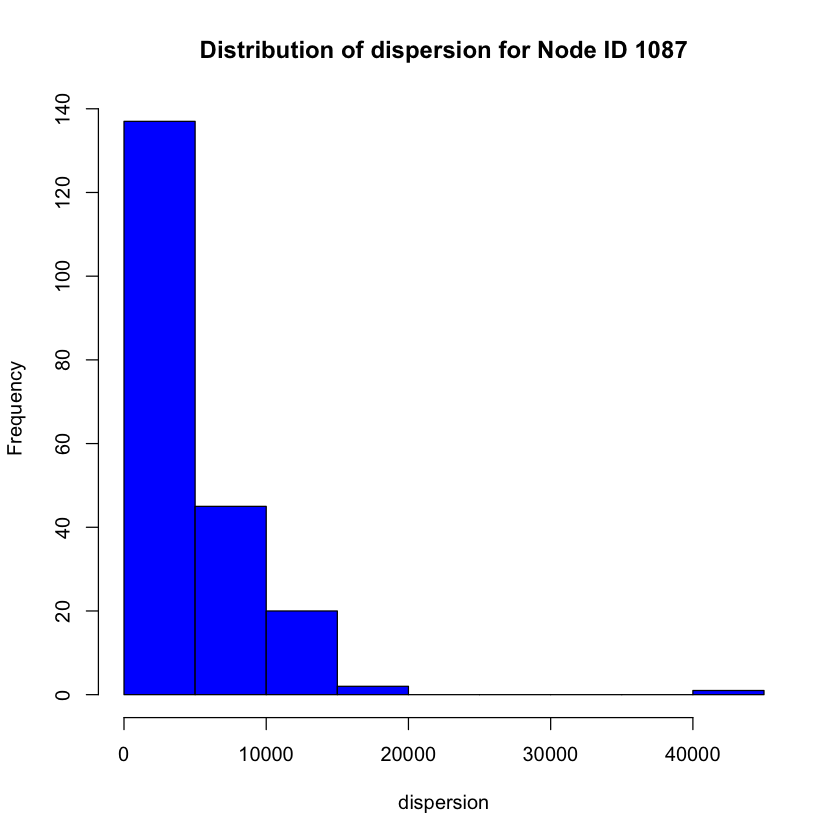

In [493]:
# 12
# Embeddedness
ego_nodes = c(0,107,348,483,1086)

for (ego_node in ego_nodes){
    embeddedness = numeric(0)
    
    node_no = which(V(g)$name == as.character(ego_node))
    personal_network = induced.subgraph(g, c(node_no, neighbors(g,node_no)))
    embeddedness = numeric(0)
    new_index = which(V(personal_network)$name == as.character(ego_node))

    for (node in neighbors(personal_network, new_index)){
            embeddedness = c(embeddedness, length(mutual_friends(personal_network, new_index, node)))
        }

    hist(embeddedness, main=paste('Distribution of embeddedness for Node ID',ego_node+1),col='blue')
    
# Dispersion
    dispersion = numeric(0)
    for (node in neighbors(personal_network, new_index)){
        mutual = mutual_friends(personal_network, new_index, node)

        sub_label = numeric(0)
        for (id in mutual){
            sub_label = c(sub_label, V(personal_network)[id]$name)
        }
        modified_graph = delete.vertices(personal_network, c(new_index, node))
        modified_node_no = numeric(0)
        for (label in sub_label){
            modified_node_no = c(modified_node_no, which(V(modified_graph)$name == label))
        }

        if (length(mutual)!=0){
            shortest_dist = shortest.paths(modified_graph, v=c(modified_node_no), to=c(modified_node_no))
            shortest_dist[shortest_dist==Inf] = diameter(modified_graph) + 5
            dispersion = c(dispersion, sum(rowSums(shortest_dist))/2)
        }
    }
    hist(dispersion, main=paste('Distribution of dispersion for Node ID',ego_node+1),col='blue')
}

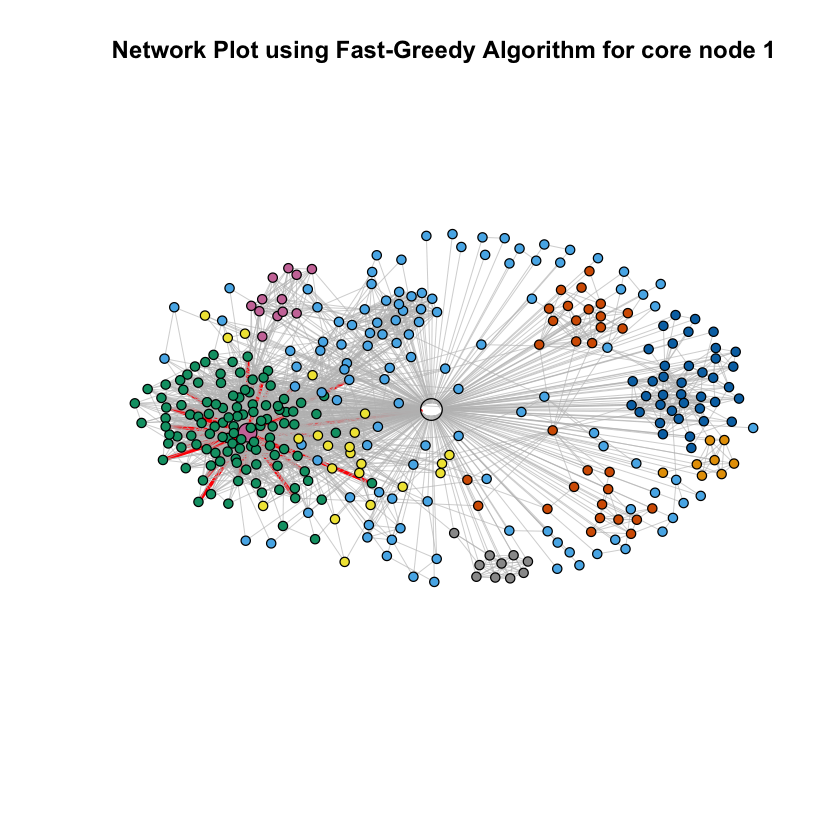

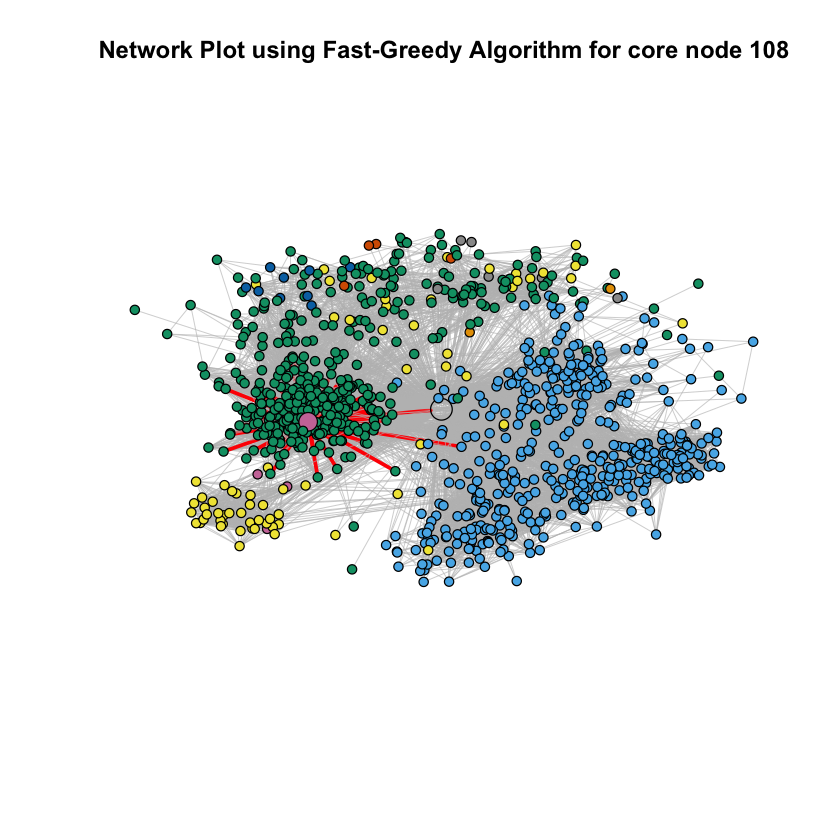

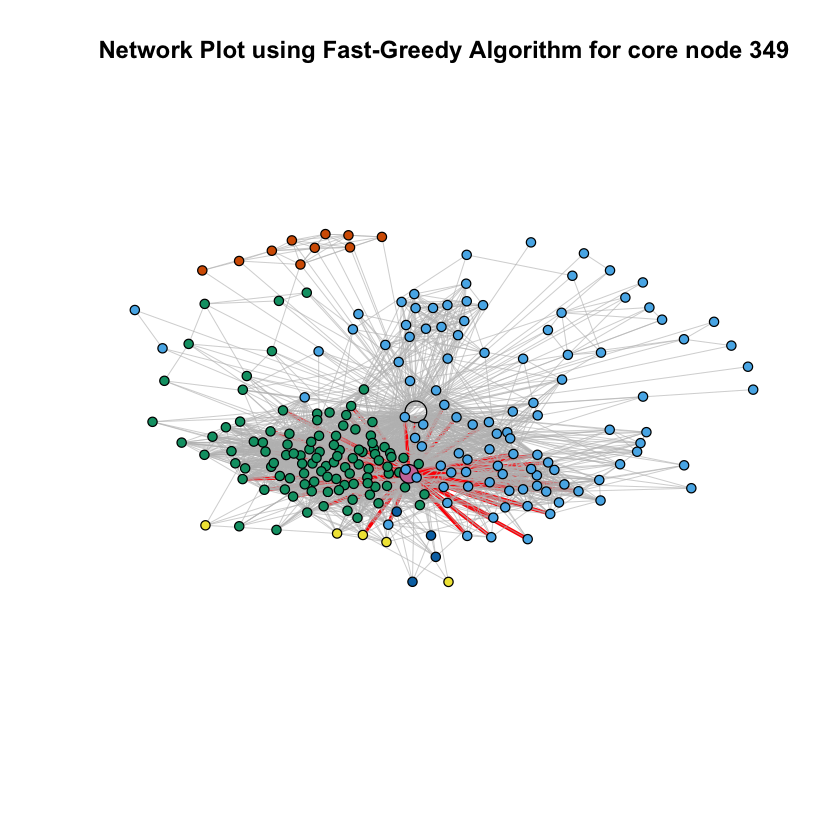

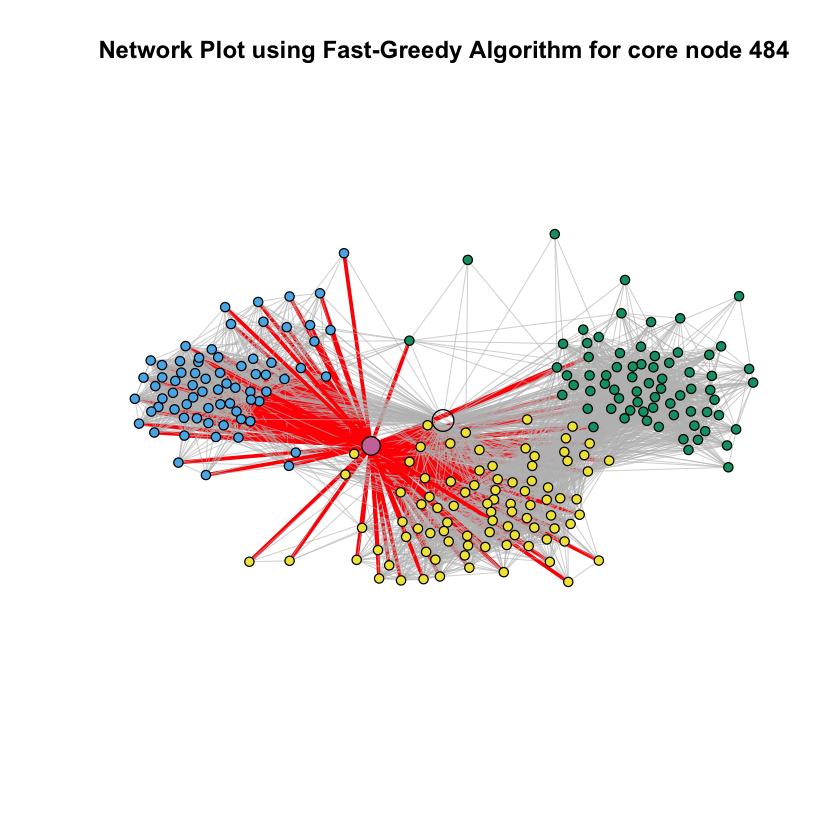

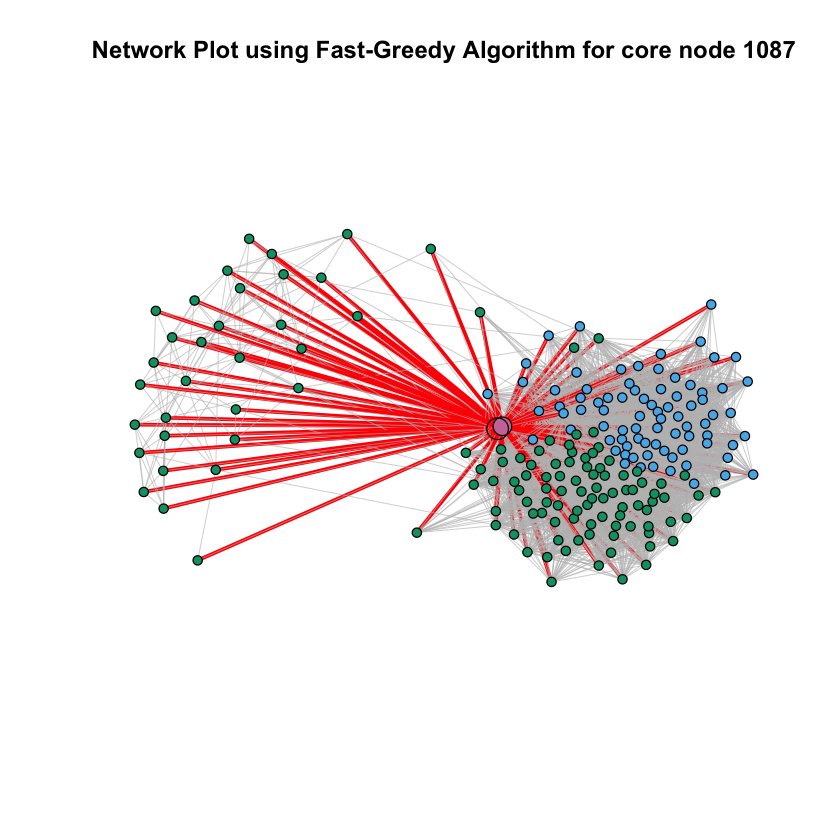

In [497]:
# 13

ego_nodes = c(0,107,348,483,1086)
a_id = numeric(0)
for (ego_node in ego_nodes){
    node_no = which(V(g)$name == as.character(ego_node))
    personal_network = induced.subgraph(g, c(node_no, neighbors(g,node_no)))
    new_index = which(V(personal_network)$name == as.character(ego_node))
    
    community_fg = fastgreedy.community(personal_network)
    
    # Dispersion
    dispersion = numeric(0)
    max = -1
    for (node in neighbors(personal_network, new_index)){
        mutual = mutual_friends(personal_network, new_index, node)
        sub_label = numeric(0)
        for (id in mutual){
            sub_label = c(sub_label, V(personal_network)[id]$name)
        }

        modified_graph = delete.vertices(personal_network, c(new_index, node))
        modified_node_no = numeric(0)
        for (label in sub_label){
            modified_node_no = c(modified_node_no, which(V(modified_graph)$name == label))
        }
            
        
        if (length(mutual)!=0){
            shortest_dist = shortest.paths(modified_graph, v=c(modified_node_no), to=c(modified_node_no))
            shortest_dist[shortest_dist==Inf] = diameter(modified_graph) + 5
            tot = sum(rowSums(shortest_dist))/2
            dispersion = c(dispersion, tot)
            
            if(tot>max){
                max = tot
                ind = node
            }
        }
    }
    v_vector = rep(3,vcount(personal_network))
    v_vector[ind]=6
    v_vector[new_index] = 7
    
    edge_color = rep("grey", length(E(personal_network)))
    edge_weight = rep(0.5, length(E(personal_network)))
    
    edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == ind | 
                    get.edgelist(personal_network, name = FALSE)[,2] == ind)] = "red";
    edge_weight[which(get.edgelist(personal_network, name = FALSE)[,1] == ind |  
                     get.edgelist(personal_network, name = FALSE)[,2] == ind)] = 3;
    
    color_vector = community_fg$membership+1
    color_vector[new_index] = 0
    color_vector[ind] = 7
    plot(personal_network,vertex.color=color_vector,vertex.label=NA,vertex.size=v_vector, edge.width = edge_weight, edge.color =  edge_color, main = paste("Network Plot using Fast-Greedy Algorithm for core node",ego_node+1), asp=9/16, layout = layout.fruchterman.reingold)
    a_id = c(a_id, ind)
}


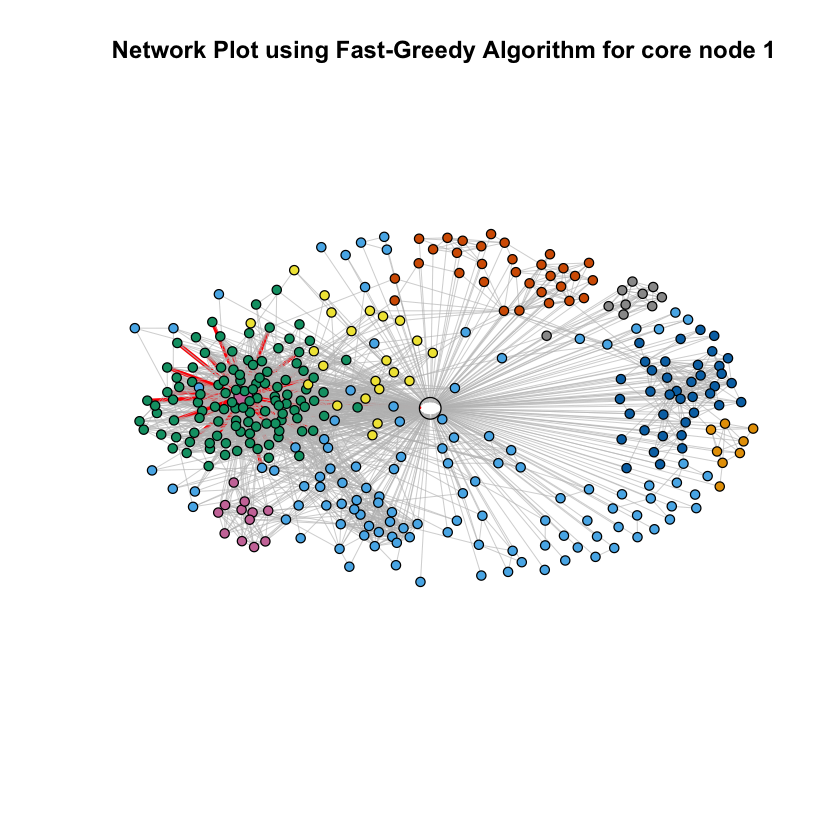

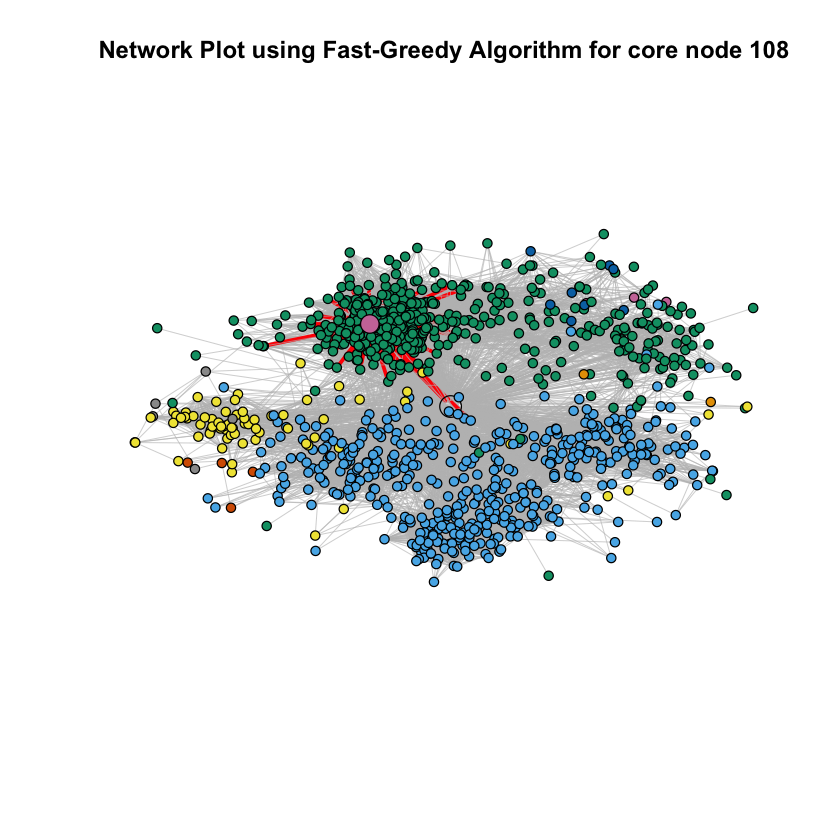

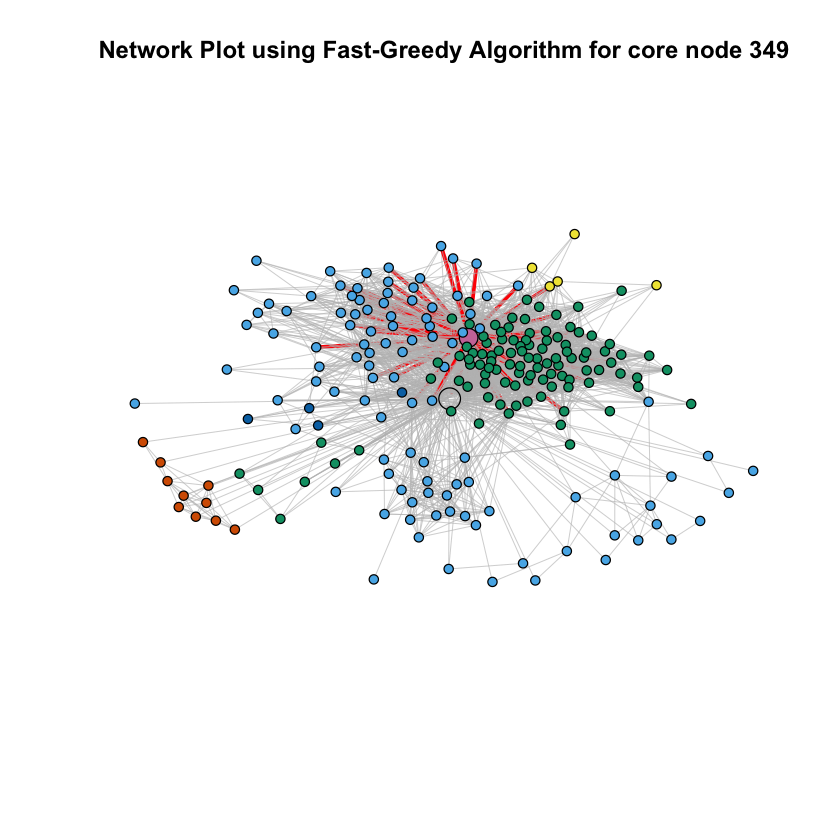

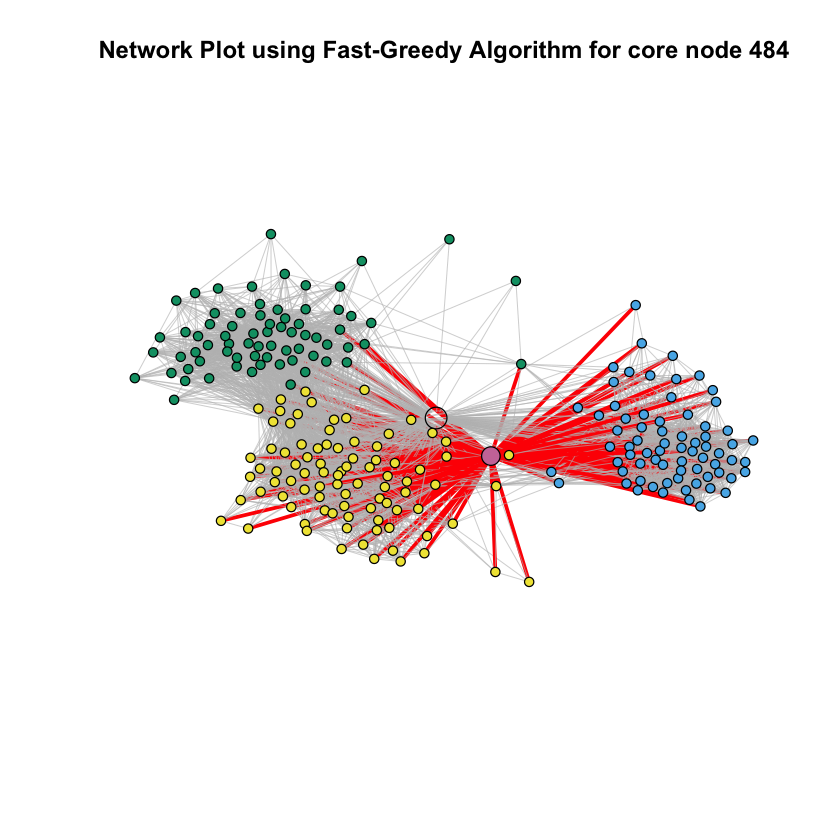

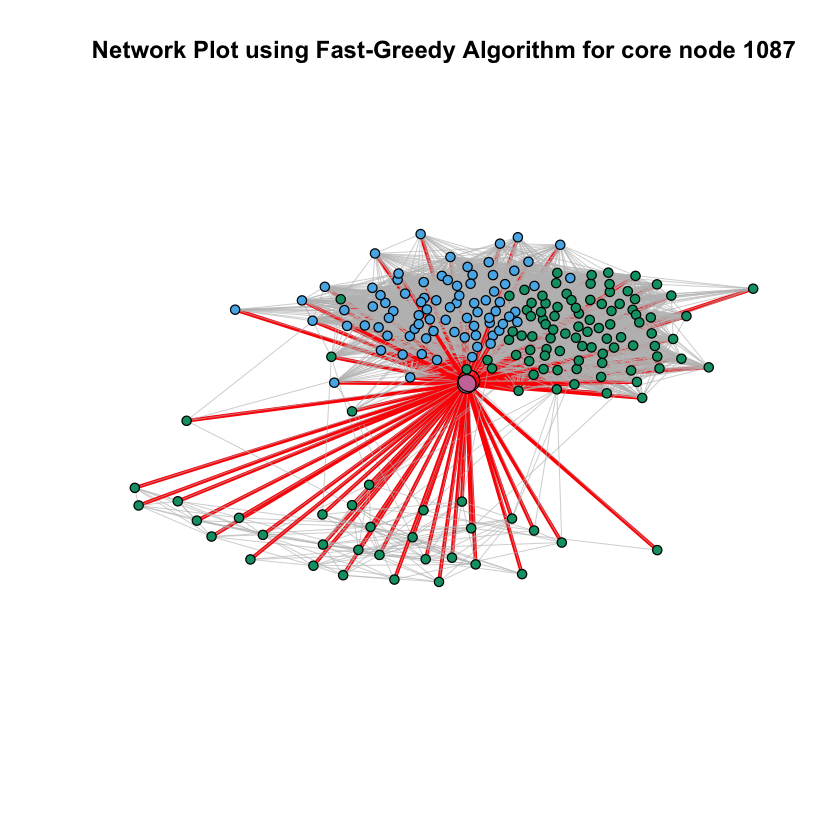

In [498]:
# 14(a) - Embeddedness

ego_nodes = c(0,107,348,483,1086) # size: 348, 106, 230, 232, 206
b_id = numeric(0)
for (ego_node in ego_nodes){
    node_no = which(V(g)$name == as.character(ego_node))
    personal_network = induced.subgraph(g, c(node_no, neighbors(g,node_no)))
    new_index = which(V(personal_network)$name == as.character(ego_node))
    
    community_fg = fastgreedy.community(personal_network)
    
    embeddedness = numeric(0)
    max = -1
    new_index = V(personal_network)$name == as.character(ego_node)

    for (node in neighbors(personal_network, new_index)){
        tot = length(mutual_friends(personal_network, new_index, node))
        embeddedness = c(embeddedness, tot)
          
        if(tot>max){
                max = tot
                ind = node
            }
    }

    v_vector = rep(3,vcount(personal_network))
    v_vector[ind]=6
    v_vector[new_index] = 7
    
    edge_color = rep("grey", length(E(personal_network)))
    edge_weight = rep(0.5, length(E(personal_network)))
    
    edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == ind | 
                    get.edgelist(personal_network, name = FALSE)[,2] == ind)] = "red";
    edge_weight[which(get.edgelist(personal_network, name = FALSE)[,1] == ind |  
                     get.edgelist(personal_network, name = FALSE)[,2] == ind)] = 3;
    
    color_vector = community_fg$membership+1
    color_vector[new_index] = 0
    color_vector[ind] = 7
    plot(personal_network,vertex.color=color_vector,vertex.label=NA,vertex.size=v_vector, edge.width = edge_weight, edge.color =  edge_color, main = paste("Network Plot using Fast-Greedy Algorithm for core node",ego_node+1), asp=9/16, layout = layout.fruchterman.reingold)
    b_id = c(b_id, ind)
}


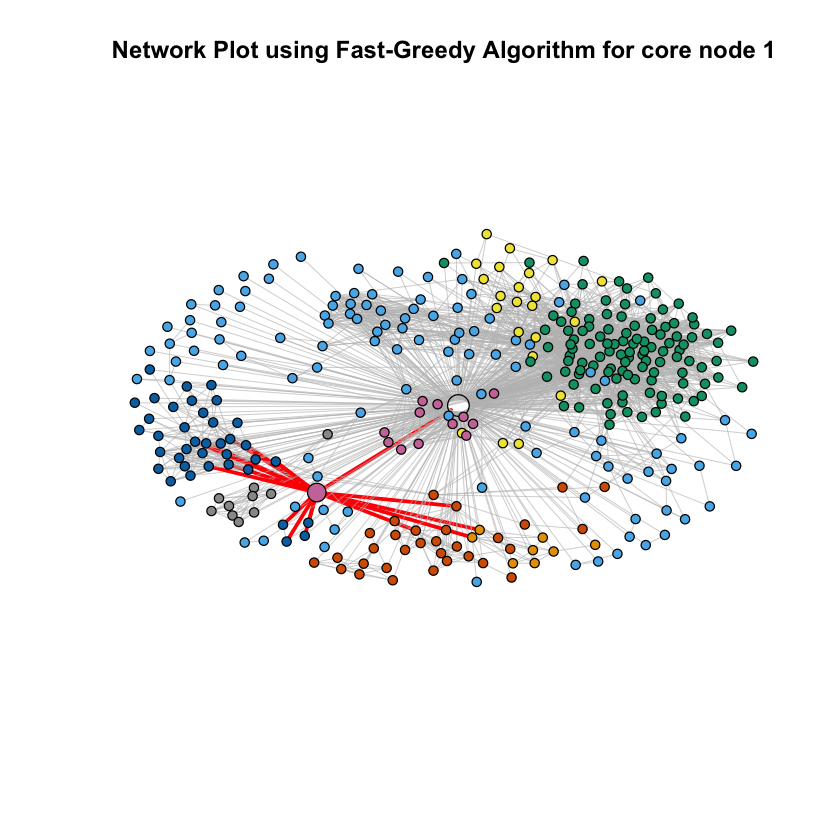

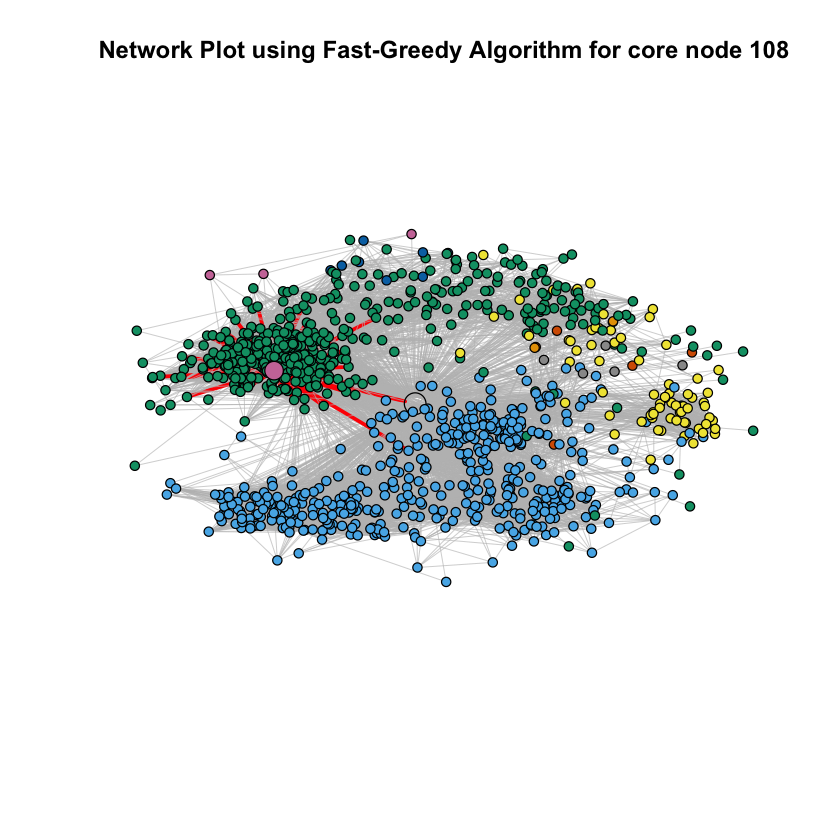

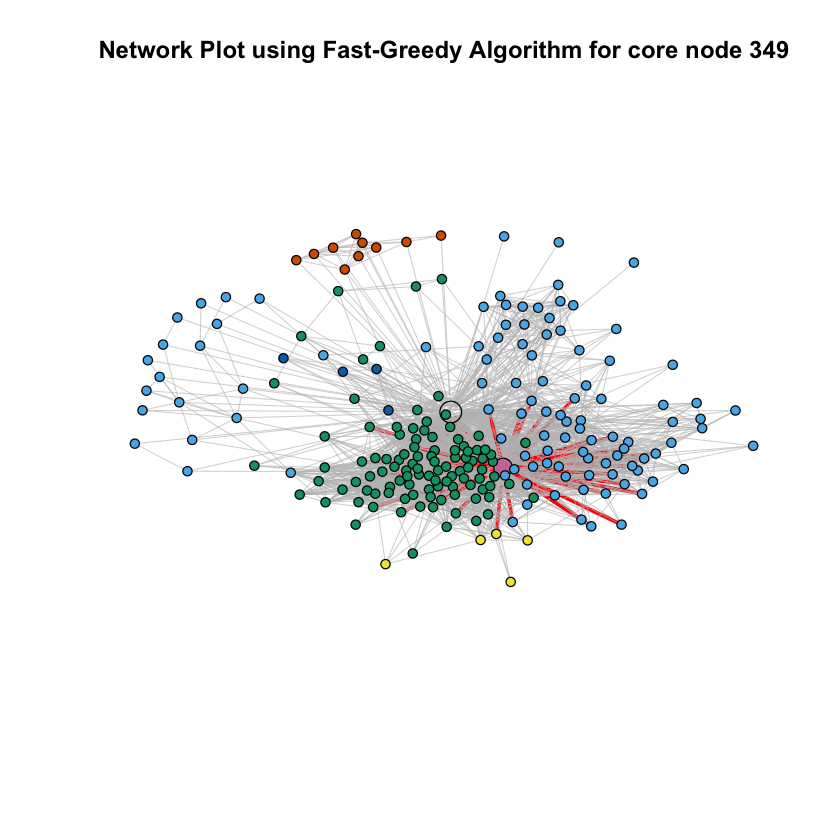

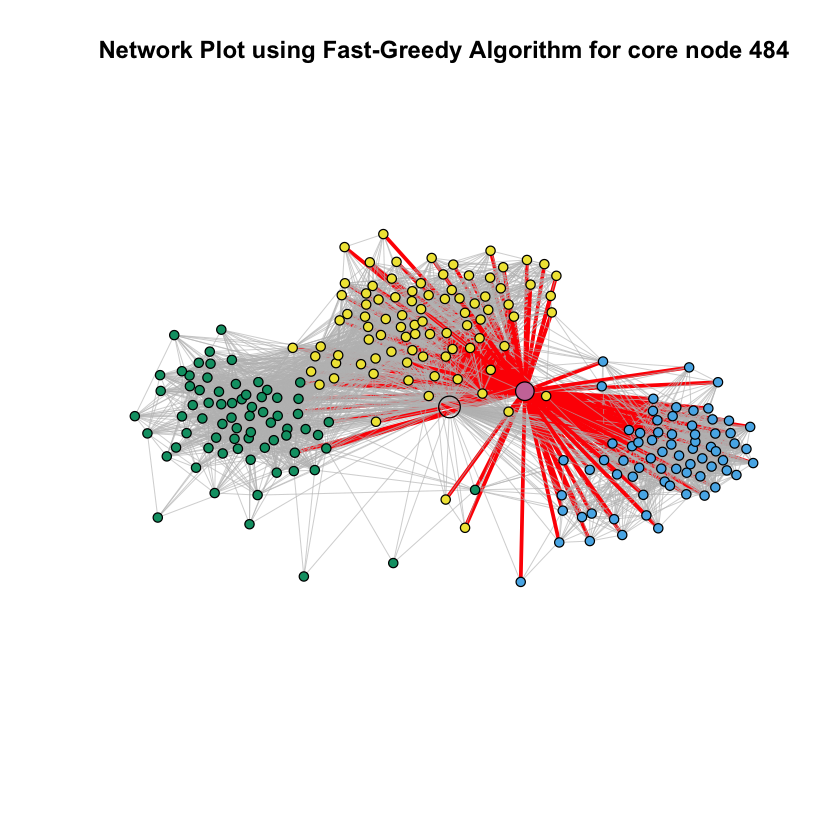

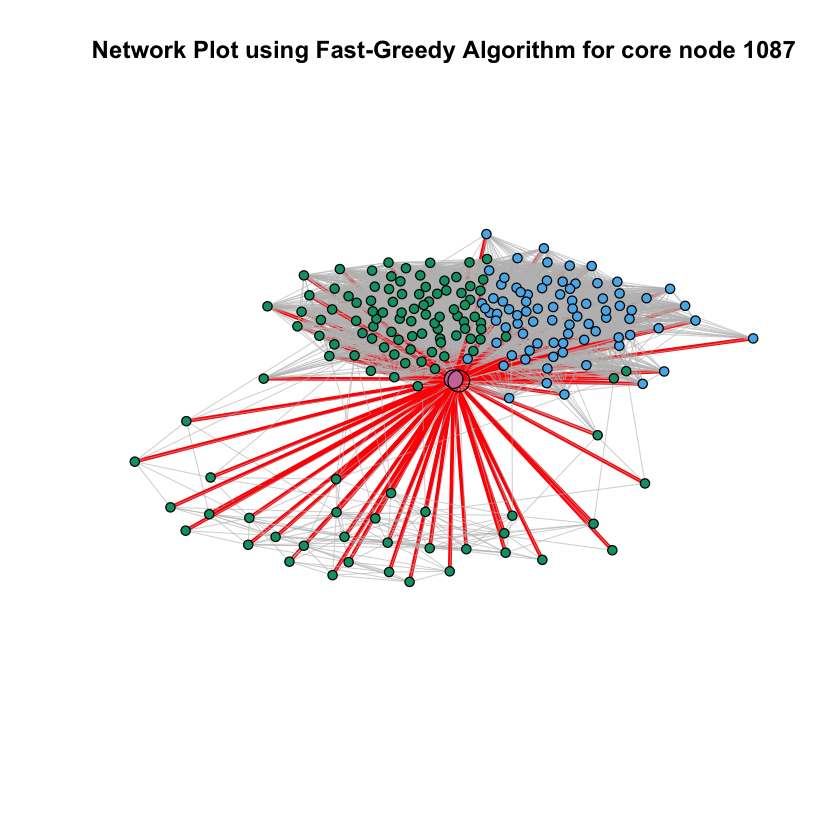

In [499]:
# 14(b) - Embeddedness/Dispersion

ego_nodes = c(0,107,348,483,1086)
c_id = numeric(0)
for (ego_node in ego_nodes){
    
    embeddedness = numeric(0)
    dispersion = numeric(0)
    node_no = which(V(g)$name == as.character(ego_node))
    personal_network = induced.subgraph(g, c(node_no, neighbors(g,node_no)))
    new_index = which(V(personal_network)$name == as.character(ego_node))
    max = -1
    community_fg = fastgreedy.community(personal_network)
    
    for (node in neighbors(personal_network, new_index)){
            deno = length(mutual_friends(personal_network, new_index, node))
            embeddedness = c(embeddedness, deno)
    
            mutual = mutual_friends(personal_network, new_index, node)
            sub_label = numeric(0)
            for (id in mutual){
                sub_label = c(sub_label, V(personal_network)[id]$name)
            }

            modified_graph = delete.vertices(personal_network, c(new_index, node))
            modified_node_no = numeric(0)
            for (label in sub_label){
                modified_node_no = c(modified_node_no, which(V(modified_graph)$name == label))
            }
        

            if (length(mutual)!=0){
                shortest_dist = shortest.paths(modified_graph, v=c(modified_node_no), to=c(modified_node_no))
                shortest_dist[shortest_dist==Inf] = diameter(modified_graph) + 5
                num = sum(rowSums(shortest_dist))/2
                dispersion = c(dispersion, num)
            }
        
#             if(deno==0){
#                 deno = 0.0001
#             }
            if(deno!=0){
                tot = num/deno
                if(tot>max){
                    max = tot
                    ind = node
                }
            }
        }
    v_vector = rep(3,vcount(personal_network))
    v_vector[ind]=6
    v_vector[new_index] = 7
    
    edge_color = rep("grey", length(E(personal_network)))
    edge_weight = rep(0.5, length(E(personal_network)))
    
    edge_color[which(get.edgelist(personal_network, name = FALSE)[,1] == ind | 
                    get.edgelist(personal_network, name = FALSE)[,2] == ind)] = "red";
    edge_weight[which(get.edgelist(personal_network, name = FALSE)[,1] == ind |  
                     get.edgelist(personal_network, name = FALSE)[,2] == ind)] = 3;
    
    color_vector = community_fg$membership+1
    color_vector[new_index] = 0
    color_vector[ind] = 7
    plot(personal_network,vertex.color=color_vector,vertex.label=NA,vertex.size=v_vector, edge.width = edge_weight, edge.color =  edge_color, main = paste("Network Plot using Fast-Greedy Algorithm for core node",ego_node+1), asp=9/16, layout = layout.fruchterman.reingold)
    c_id = c(c_id, ind)
    
}

In [6]:
# 16

ego_nodes = c(414)

for (ego_node in ego_nodes){
    embeddedness = numeric(0)
    
    node_no = which(V(g)$name == as.character(ego_node))
    personal_network = induced.subgraph(g, c(node_no, neighbors(g,node_no)))
    deg = degree(personal_network)
    
    labels = c(V(personal_network)$name[degree(personal_network)==24])
    ids = numeric(0)
    for (label in labels){
        id = which(V(personal_network)$name == label)
        ids = c(ids, id)
    }
    print(length(ids))
}
ids

[1] 11


[1]  31  53  73  83  86  94 108 120 121 122 123

In [7]:
common_measure = function(network, node1, node2){
    score = length(intersect(neighbors(network, node1), neighbors(network, node2)))
    return(score)
}

In [8]:
jaccard_measure = function(network, node1, node2){
    num = length(intersect(neighbors(network, node1), neighbors(network, node2)))
    deno = length(union(neighbors(network, node1), neighbors(network, node2)))
    if (deno==0)
        return(0)
    score = num/deno
    return(score)
}

In [9]:
adamic_measure = function(network, node1, node2){
    mutual = intersect(neighbors(network, node1), neighbors(network, node2))
    score = 0
    for(node in mutual){
        n = neighbors(network, node)
        score = score + (1/log(length(n)))
    }
    return(score)
}

In [10]:
recommend_friends = function(network, name, number, mode){
    n = neighbors(network, as.character(name))
#     neighbor_complement = setdiff(V(network), c(name, n))
    neighbor_complement = network - unlist(n) - name
    new_vertices = vertex_attr(neighbor_complement)$name
          
    friend_list = numeric(0)
    score_list = numeric(0)
    label_top_friends = numeric(0)
    for(i in new_vertices){
        if(mode=='jaccard'){
            score = jaccard_measure(network, i, name)
            friend_list = c(friend_list, i)
            score_list = c(score_list, score)
        }
        else if(mode=='common'){
            score = common_measure(network, i, name)
            friend_list = c(friend_list, i)
            score_list = c(score_list, score)
        }
        else if(mode=='adamic'){
            score = adamic_measure(network, i, name)
            friend_list = c(friend_list, i)
            score_list = c(score_list, score)
        }
    }
    
    indices = sort(score_list, decreasing=TRUE, index.return=TRUE)$ix
    friend_list = friend_list[c(indices)]
    label_top_friends = friend_list[1:number]
    
    return(label_top_friends)
}

In [782]:
# 17(a) Common Neighbors Measure

all_users = numeric(0)
for (id in labels){
    sum = 0
    for (iteration in c(1:10)){
    edge_list = which(get.edgelist(personal_network)[,1] == id | get.edgelist(personal_network)[,2] == id)

    delete_ids = numeric(0)
    delete_labels = numeric(0)
    for (ind in edge_list){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.25){# delete the node
            node_1 = get.edgelist(personal_network)[ind, 1]
            node_2 = get.edgelist(personal_network)[ind, 2]
            node_ind = node_1
            if (node_1==id){
                node_ind = node_2
            }
            delete_labels = c(delete_labels, node_ind)
        }
    }
    modified_graph = delete_edges(personal_network, paste(id,"|",c(delete_labels), sep=""))

    recommended_labels = recommend_friends(modified_graph, id, length(delete_labels),'common')
    sum = sum + length(intersect(recommended_labels, delete_labels))/length(delete_labels)
    
    }
    all_users = c(all_users, sum/10)
}

print(mean(all_users))


[1] 0.8331467


In [776]:
# 17(b) Jaccard Measure

all_users = numeric(0)
for (id in labels){
    sum = 0
    for (iteration in c(1:10)){
    edge_list = which(get.edgelist(personal_network)[,1] == id | get.edgelist(personal_network)[,2] == id)

    delete_ids = numeric(0)
    delete_labels = numeric(0)
    for (ind in edge_list){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.25){# delete the node
            node_1 = get.edgelist(personal_network)[ind, 1]
            node_2 = get.edgelist(personal_network)[ind, 2]
            node_ind = node_1
            if (node_1==id){
                node_ind = node_2
            }
            delete_labels = c(delete_labels, node_ind)
        }
    }
    modified_graph = delete_edges(personal_network, paste(id,"|",c(delete_labels), sep=""))

    recommended_labels = recommend_friends(modified_graph, id, length(delete_labels),'jaccard')
    sum = sum + length(intersect(recommended_labels, delete_labels))/length(delete_labels)
    
    }
    all_users = c(all_users, sum/10)
}

print(mean(all_users))

[1] 0.7980942


In [788]:
# 17(c) Adamic Measure

all_users = numeric(0)
for (id in labels){
    sum = 0
    for (iteration in c(1:10)){
    edge_list = which(get.edgelist(personal_network)[,1] == id | get.edgelist(personal_network)[,2] == id)

    delete_ids = numeric(0)
    delete_labels = numeric(0)
    for (ind in edge_list){
        alpha <- sample(seq(0, 1, by=0.05), size = 1, replace = TRUE)
        if(alpha<=0.25){# delete the node
            node_1 = get.edgelist(personal_network)[ind, 1]
            node_2 = get.edgelist(personal_network)[ind, 2]
            node_ind = node_1
            if (node_1==id){
                node_ind = node_2
            }
            delete_labels = c(delete_labels, node_ind)
        }
    }
    modified_graph = delete_edges(personal_network, paste(id,"|",c(delete_labels), sep=""))

    recommended_labels = recommend_friends(modified_graph, id, length(delete_labels),'adamic')
    sum = sum + length(intersect(recommended_labels, delete_labels))/length(delete_labels)
    
    }
    all_users = c(all_users, sum/10)
}

print(mean(all_users))

[1] 0.8478837
